In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

NameError: name 'class_names' is not defined

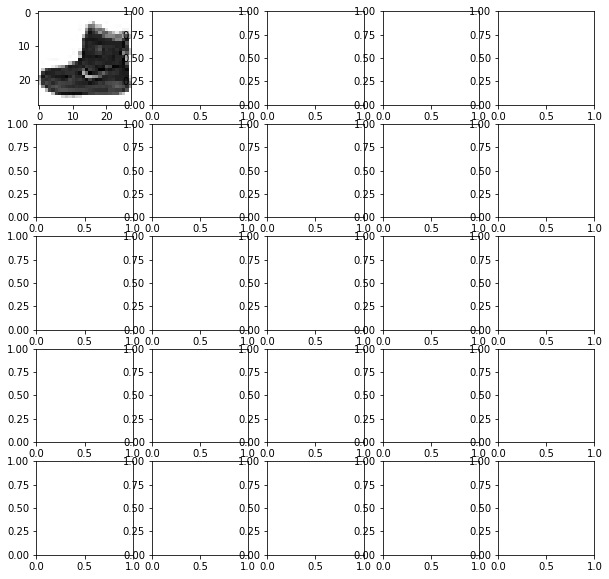

In [5]:
import matplotlib.pyplot as plt

fig, axs=plt.subplots(5,5,figsize=(10,10),)

for i in range(25):
    k,j = i//5, i%5    
    axs[k,j].imshow(X_train[i], cmap=plt.cm.binary)
    axs[k,j].set_xlabel(class_names[y_train[i]])
fig.tight_layout()

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
input_shape=(28,28,1)
num_classes=len(class_names)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 6ms/step - loss: 0.6948 - accuracy: 0.7494 - val_loss: 0.4376 - val_accuracy: 0.8408
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.4496 - accuracy: 0.8385 - val_loss: 0.3839 - val_accuracy: 0.8640
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3999 - accuracy: 0.8586 - val_loss: 0.3422 - val_accuracy: 0.8758
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3742 - accuracy: 0.8649 - val_loss: 0.3304 - val_accuracy: 0.8777
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3525 - accuracy: 0.8730 - val_loss: 0.3238 - val_accuracy: 0.8797
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3360 - accuracy: 0.8779 - val_loss: 0.3086 - val_accuracy: 0.8858
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3229 - accuracy: 0.8837 - val_loss: 0.2921 - val_accuracy: 0.8900
Epoch 